Shape of train_feat_X: (7080, 13, 768)
Shape of train_emoticon_X_encoded: (7080, 7080)
Training Logistic Regression...
Logistic Regression trained on 20.0% of the data: Validation Accuracy = 0.9294
Logistic Regression trained on 40.0% of the data: Validation Accuracy = 0.9569
Logistic Regression trained on 60.0% of the data: Validation Accuracy = 0.9647
Logistic Regression trained on 80.0% of the data: Validation Accuracy = 0.9675
Logistic Regression trained on 100.0% of the data: Validation Accuracy = 0.9710
Training kNN...
kNN trained on 20.0% of the data: Validation Accuracy = 0.5339
kNN trained on 40.0% of the data: Validation Accuracy = 0.5438
kNN trained on 60.0% of the data: Validation Accuracy = 0.5544
kNN trained on 80.0% of the data: Validation Accuracy = 0.5452
kNN trained on 100.0% of the data: Validation Accuracy = 0.5275
Training Decision Tree...
Decision Tree trained on 20.0% of the data: Validation Accuracy = 0.8863
Decision Tree trained on 40.0% of the data: Validation

c:\python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step
CNN trained on 20.0% of the data: Validation Accuracy = 0.9287


c:\python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step
CNN trained on 40.0% of the data: Validation Accuracy = 0.9075


c:\python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step
CNN trained on 60.0% of the data: Validation Accuracy = 0.9562


c:\python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step
CNN trained on 80.0% of the data: Validation Accuracy = 0.9407


c:\python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step
CNN trained on 100.0% of the data: Validation Accuracy = 0.9654


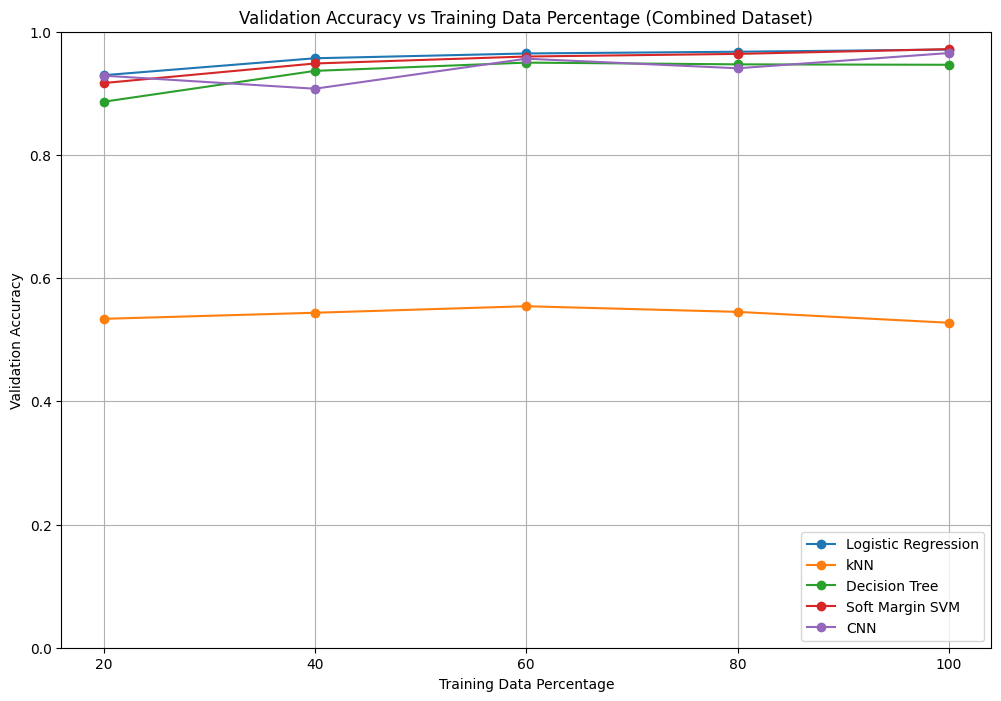

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Load Datasets
# First Dataset (Emoticons)
train_emoticon_df = pd.read_csv("datasets/train/train_emoticon.csv")
train_emoticon_X = train_emoticon_df['input_emoticon'].tolist()
train_emoticon_Y = train_emoticon_df['label'].tolist()

train_emoticon_X_reshaped = np.array(train_emoticon_X).reshape(-1, 1)

# Second Dataset (Deep Features)
train_feat = np.load("datasets/train/train_feature.npz", allow_pickle=True)
train_feat_X = train_feat['features']
train_feat_Y = train_feat['label']

# Third Dataset (Text Sequences)
train_seq_df = pd.read_csv("datasets/train/train_text_seq.csv")
train_seq_X = train_seq_df['input_str'].tolist()
train_seq_Y = train_seq_df['label'].tolist()

# Convert labels to integers
label_encoder = LabelEncoder()
train_emoticon_Y = label_encoder.fit_transform(train_emoticon_Y)
train_feat_Y = label_encoder.fit_transform(train_feat_Y)
train_seq_Y = label_encoder.fit_transform(train_seq_Y)

# Prepare the third dataset: digit encoding
max_length = 50
train_seq_X_encoded = [[int(digit) for digit in seq] for seq in train_seq_X]
train_seq_X_encoded = np.array(train_seq_X_encoded)

# Feature Transformation

# 1. One-Hot Encoding for Emoticons
encoder = OneHotEncoder(sparse_output=False)
train_emoticon_X_encoded = encoder.fit_transform(train_emoticon_X_reshaped)

# 2. Check the shape of train_feat_X and reshape if necessary
print("Shape of train_feat_X:", train_feat_X.shape)  # For debugging
print("Shape of train_emoticon_X_encoded:", train_emoticon_X_encoded.shape)  # For debugging

# 3. Reshape train_feat_X to 2D if it has more than 2 dimensions
if train_feat_X.ndim > 2:
    train_feat_X_reshaped = train_feat_X.reshape(train_feat_X.shape[0], -1)  # Flatten the feature matrix
else:
    train_feat_X_reshaped = train_feat_X

# 4. Concatenate Deep Features with One-Hot Encoded Features
combined_features = np.concatenate((train_feat_X_reshaped, train_emoticon_X_encoded), axis=1)

# 5. Concatenate the Combined Features with Digit Encoded Features
final_features = np.concatenate((combined_features, train_seq_X_encoded), axis=1)
final_features = final_features.reshape(final_features.shape[0], final_features.shape[1], 1)

# Prepare labels
final_labels = train_seq_Y  # or any other dataset's labels since they are the same

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(final_features, final_labels, test_size=0.2, random_state=42)

# Define the function to build the CNN model
def build_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape[1:]))  # Adjust input shape
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Adjust output size based on classes
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Define function to train and evaluate models
def train_model_on_subsets(model_func, model_type, X_train, y_train, X_val, y_val):
    percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
    accuracies = []
    
    for p in percentages:
        subset_size = int(len(X_train) * p)
        X_train_subset = X_train[:subset_size]
        y_train_subset = y_train[:subset_size]

        if model_type == "CNN":
            # Build and train the CNN model
            model = build_cnn_model(X_train_subset.shape)  # Keep input shape for CNN
            model.fit(X_train_subset, y_train_subset, epochs=10, batch_size=64, verbose=0)
            y_val_pred = np.argmax(model.predict(X_val), axis=-1)
            val_accuracy = accuracy_score(y_val, y_val_pred)
        else:
            # For traditional machine learning models, reshape to 2D
            X_train_subset_reshaped = X_train_subset.reshape(subset_size, -1)  # Flatten the input
            model = model_func()  # Create the model
            model.fit(X_train_subset_reshaped, y_train_subset)  # Fit the model with 2D data
            y_val_pred = model.predict(X_val.reshape(X_val.shape[0], -1))  # Ensure validation data is also 2D
            val_accuracy = accuracy_score(y_val, y_val_pred)

        accuracies.append(val_accuracy)
        print(f"{model_type} trained on {p * 100}% of the data: Validation Accuracy = {val_accuracy:.4f}")

    return percentages, accuracies

# Define models
models = {
    "Logistic Regression": lambda: LogisticRegression(max_iter=1000),
    "kNN": lambda: KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": lambda: DecisionTreeClassifier(),
    "Soft Margin SVM": lambda: SVC(kernel='linear', C=1),
    "CNN": build_cnn_model
}

# Store results for plotting
results = {}

# Train and evaluate each model
for model_name, model_func in models.items():
    print(f"Training {model_name}...")
    percentages, accuracies = train_model_on_subsets(model_func, model_name, X_train, y_train, X_val, y_val)
    results[model_name] = (percentages, accuracies)

# Plotting the results
plt.figure(figsize=(12, 8))
for model_name, (percentages, accuracies) in results.items():
    plt.plot([p * 100 for p in percentages], accuracies, marker='o', label=model_name)

plt.title("Validation Accuracy vs Training Data Percentage (Combined Dataset)")
plt.xlabel("Training Data Percentage")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.xticks([20, 40, 60, 80, 100])
plt.ylim(0, 1)  # Set y-axis limits for clarity
plt.legend(loc="lower right")
plt.show()
